<a href="https://colab.research.google.com/github/muppallajhansi/Jhansi_INFO5731_Fall2024/blob/main/Muppalla_Jhansi_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [4]:
import pandas as pd
import re
from collections import defaultdict
import os

# Define the path to the review dataset
dataset_path = 'imdb_reviews.csv'

# Ensure the file exists and has content
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The file '{dataset_path}' was not found.")
elif os.path.getsize(dataset_path) == 0:
    raise ValueError(f"The file '{dataset_path}' is empty.")

# Attempt to read the dataset
try:
    data_frame = pd.read_csv(dataset_path)
except pd.errors.EmptyDataError:
    raise ValueError("No data could be parsed from the file.")

# Helper function to tokenize text into words
def split_into_words(text):
    return re.findall(r'\b\w+\b', text.lower())

# Generate N-grams for text
def create_ngrams(text, n):
    words_list = split_into_words(text)
    ngrams = zip(*[words_list[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Set up counters for unigrams, bigrams, trigrams, and noun phrases
word_count = defaultdict(int)
pair_count = defaultdict(int)
three_word_count = defaultdict(int)
phrase_count = defaultdict(int)
review_phrases_list = []

# Analyze each review in the dataset
for index, review_content in enumerate(data_frame['Review']):
    # Count trigrams
    trigram_list = create_ngrams(review_content, 3)
    for trigram in trigram_list:
        three_word_count[trigram] += 1

    # Count bigrams and unigrams
    words = split_into_words(review_content)
    bigram_list = [" ".join([words[i], words[i + 1]]) for i in range(len(words) - 1)]
    for word in words:
        word_count[word] += 1
    for bigram in bigram_list:
        pair_count[bigram] += 1

    # Extract noun phrases
    def get_noun_phrases(text):
        words = split_into_words(text)
        phrases = []
        for i in range(len(words) - 1):
            if words[i].isalpha() and words[i + 1].isalpha():
                phrases.append(f"{words[i]} {words[i + 1]}")
        return phrases

    noun_phrases = get_noun_phrases(review_content)
    review_phrases_list.append({phrase: noun_phrases.count(phrase) for phrase in noun_phrases})
    for phrase in noun_phrases:
        phrase_count[phrase] += 1

# Sort and display the most frequent trigrams
top_three_word_phrases = sorted(three_word_count.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top Trigrams:", top_three_word_phrases)

# Calculate probabilities for each bigram
pair_probabilities = {
    bigram: count / word_count[bigram.split()[0]]
    for bigram, count in pair_count.items()
}
top_pair_probs = sorted(pair_probabilities.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top Bigram Probabilities:", top_pair_probs)

# Compute relative frequencies for noun phrases
max_phrase_frequency = max(phrase_count.values(), default=1)
relative_probs_list = []

for i, phrases in enumerate(review_phrases_list):
    row = {"Review": f"Review {i+1}"}
    for phrase, count in phrases.items():
        relative_probability = count / max_phrase_frequency
        row[phrase] = relative_probability
    relative_probs_list.append(row)

# Create a DataFrame to store relative noun phrase probabilities
relative_probabilities_df = pd.DataFrame(relative_probs_list).fillna(0)
print("Relative Probabilities Table (First 100 Rows):\n", relative_probabilities_df.head(100))



Top Trigrams: [('the spider verse', 981), ('across the spider', 536), ('spider man across', 296), ('man across the', 294), ('spider verse is', 261)]
Top Bigram Probabilities: [('shea whigham', 1.0), ('didn t', 1.0), ('wasn t', 1.0), ('resounding win', 1.0), ('phil lord', 1.0)]
Relative Probabilities Table (First 100 Rows):
         Review      it s  s honestly  honestly absurd  absurd how  how good  \
0     Review 1  0.004167    0.000694         0.000694    0.000694  0.000694   
1     Review 2  0.002778    0.000000         0.000000    0.000000  0.000000   
2     Review 3  0.003472    0.000000         0.000000    0.000000  0.000000   
3     Review 4  0.000000    0.000000         0.000000    0.000000  0.000000   
4     Review 5  0.000000    0.000000         0.000000    0.000000  0.000000   
..         ...       ...         ...              ...         ...       ...   
95   Review 96  0.001389    0.000000         0.000000    0.000000  0.000000   
96   Review 97  0.000000    0.000000      

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [6]:
import pandas as pd
import re
import math
from collections import defaultdict

# Load the dataset and handle any potential issues with file access
dataset_path = 'imdb_reviews.csv'
try:
    reviews_data = pd.read_csv(dataset_path)
except FileNotFoundError:
    raise FileNotFoundError("The specified file was not found.")
except pd.errors.EmptyDataError:
    raise ValueError("The file is empty or improperly formatted.")

# Function to break down text into individual lowercase words
def split_text_into_words(text):
    return re.findall(r'\b\w+\b', text.lower())

# 1. Calculate Term Frequency (TF) for each document
# TF measures the frequency of each word within a document
def compute_term_frequency(docs):
    term_freqs = []
    for document in docs:
        words_list = split_text_into_words(document)
        total_words = len(words_list)
        term_frequency = defaultdict(float)
        for word in words_list:
            term_frequency[word] += 1 / total_words  # Normalized frequency per word in document
        term_freqs.append(term_frequency)
    return term_freqs

# 2. Calculate Document Frequency (DF) and Inverse Document Frequency (IDF)
# DF counts documents containing each word, and IDF measures the importance of each word across all documents
def compute_inverse_document_frequency(docs):
    document_freq = defaultdict(int)
    for document in docs:
        unique_terms = set(split_text_into_words(document))
        for term in unique_terms:
            document_freq[term] += 1

    total_docs = len(docs)  # Total number of documents
    inverse_doc_freq = {term: math.log(total_docs / doc_count) for term, doc_count in document_freq.items()}
    return inverse_doc_freq

# 3. Construct the TF-IDF Matrix
# TF-IDF matrix combines TF and IDF scores for each word in each document
def construct_tf_idf_matrix(term_frequencies, inverse_doc_freq):
    tf_idf_list = []
    for term_freq in term_frequencies:
        tf_idf = {term: term_freq[term] * inverse_doc_freq[term] for term in term_freq}
        tf_idf_list.append(tf_idf)
    return tf_idf_list

# Extract documents from the dataset
all_documents = reviews_data['Review'].tolist()
term_frequencies = compute_term_frequency(all_documents)
inverse_doc_freq = compute_inverse_document_frequency(all_documents)
tf_idf_list = construct_tf_idf_matrix(term_frequencies, inverse_doc_freq)

# 4. Prepare TF-IDF vector for the query
query_text = "An Outstanding movie with a haunting performance and best character development"
query_terms_list = split_text_into_words(query_text)
query_term_freq = defaultdict(float)
for term in query_terms_list:
    query_term_freq[term] += 1 / len(query_terms_list)

query_tf_idf_vector = {term: query_term_freq[term] * inverse_doc_freq.get(term, 0) for term in query_term_freq}

# 5. Define Cosine Similarity Function to Measure Document-Query Similarity
def compute_cosine_similarity(doc_vector, query_vector):
    # Dot product between document and query vectors
    dot_product = sum(doc_vector.get(term, 0) * query_vector.get(term, 0) for term in query_vector)
    # Magnitude calculation for each vector
    doc_magnitude = math.sqrt(sum(weight ** 2 for weight in doc_vector.values()))
    query_magnitude = math.sqrt(sum(weight ** 2 for weight in query_vector.values()))
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0
    return dot_product / (doc_magnitude * query_magnitude)

# Rank documents based on similarity scores with the query
ranked_documents = [(index, compute_cosine_similarity(tf_idf_list[index], query_tf_idf_vector))
                    for index in range(len(tf_idf_list))]
ranked_documents = sorted(ranked_documents, key=lambda x: x[1], reverse=True)

# Display the top-ranked documents
print("Top Ranked Documents:")
for doc_index, similarity_score in ranked_documents[:5]:
    print(f"Document {doc_index + 1} (Score: {similarity_score}): {all_documents[doc_index]}")





Top Ranked Documents:
Document 667 (Score: 0.16731033575126278): This movie exceeded all my expectations. The only bad thing about this movie is that it ends. I am going to be optimistic and hope that part 2 will be released in a year as promised but I am not sure that will be the case. The animation, the colors, the visuals, the characters and dialogues. Everything is masterful and it deserves its runtime of 2+ hours. I could've watched 10 hours of this story without ever being bored. The soundtrack is incredible as expected. Miguels theme is very futuristic sounding and is similar to the prowlers theme in texture. I could tell what kind of character it would be just by the first seconds of seeing him and hearing his music. The spots theme is incredibly haunting and conveys the emotions of dread and void amazingiy.
Document 781 (Score: 0.10454763533641703): A good movie overall and a good transition to the finale. I liked the character development and all the fan service provided. The

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [7]:
import pandas as pd
import re
from gensim.models import Word2Vec

# Specify the path to the dataset and read the reviews
file_path = 'imdb_reviews.csv'
try:
    reviews_df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError("The specified file could not be found.")
except pd.errors.EmptyDataError:
    raise ValueError("The file is empty or improperly formatted.")

# Function to process text by converting to lowercase and splitting into words
def preprocess_text(text):
    return re.findall(r'\b\w+\b', text.lower())

# Tokenize each review to create a list of word sequences
tokenized_reviews = [preprocess_text(review) for review in reviews_df['Review'].tolist()]

# Set up and train the Word2Vec model with 300-dimensional word embeddings
embedding_dim = 300
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=embedding_dim, window=5, min_count=2, workers=4)

# Save the trained model for later use
model_name = "word2vec_300d.model"
word2vec_model.save(model_name)

# Output information about the model and vocabulary
print("Training complete. Model saved as 'word2vec_300d.model'.\n")

# Display the total number of unique words in the model's vocabulary
print("Total Vocabulary Size:", len(word2vec_model.wv))

# Display a sample of words from the vocabulary
print("\nSample Words from Vocabulary:", list(word2vec_model.wv.index_to_key)[:10])

# Show embeddings for a few example words
sample_words = list(word2vec_model.wv.index_to_key)[:5]  # Display the first 5 words as examples
print("\nSample Embeddings:")
for word in sample_words:
    print(f"Word: {word}")
    print(f"Embedding: {word2vec_model.wv[word][:10]}...")  # Display the first 10 dimensions for simplicity
    print()






Training complete. Model saved as 'word2vec_300d.model'.

Total Vocabulary Size: 5432

Sample Words from Vocabulary: ['the', 'and', 'a', 'of', 'to', 'it', 'i', 'is', 'this', 'movie']

Sample Embeddings:
Word: the
Embedding: [ 0.2709676   0.13560171  0.14326504  0.26895234 -0.26892522 -0.5467601
  0.3832209   0.887293   -0.3608463  -0.33873034]...

Word: and
Embedding: [-0.00239515  0.3725651   0.07183609  0.20938417  0.0964587  -0.2749748
  0.20114906  0.7888834   0.19500862 -0.07451983]...

Word: a
Embedding: [ 0.22959407  0.2236119   0.07470806  0.05820195 -0.10642737 -0.46567032
  0.18672395  0.49312413 -0.07318833 -0.1118566 ]...

Word: of
Embedding: [ 0.2349704   0.25745994  0.06915433  0.1453926  -0.11793008 -0.40413216
  0.23679096  0.9089568  -0.3007426  -0.28461674]...

Word: to
Embedding: [-0.10288712  0.17699328 -0.04864588 -0.02334086  0.18032677 -0.2542506
 -0.22946748  0.6951015   0.19708057 -0.19547628]...



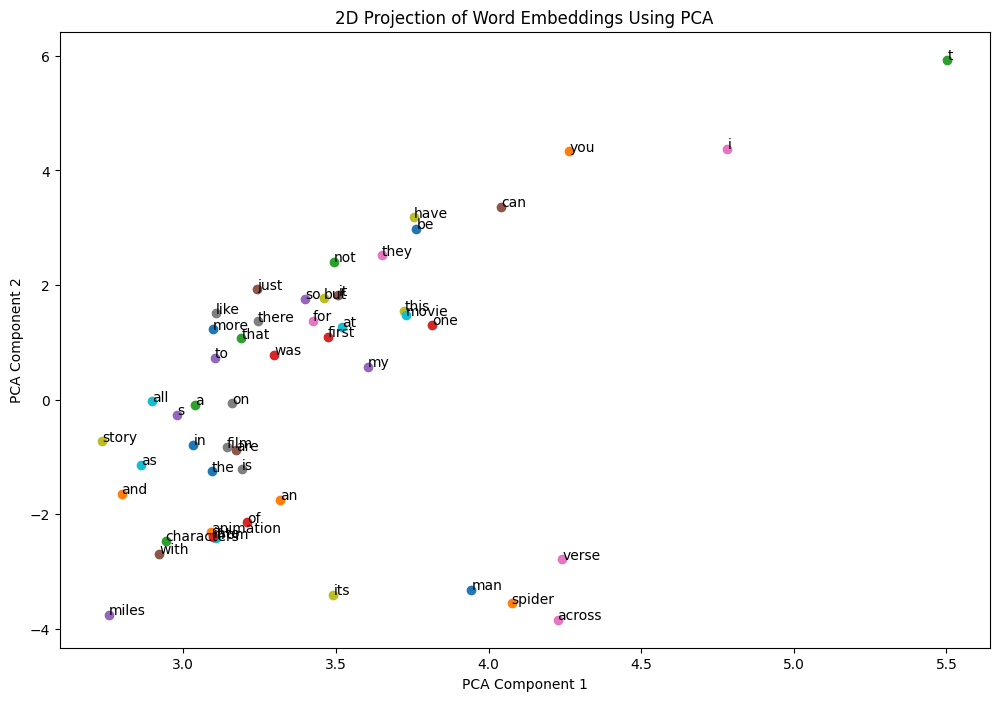

In [8]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

# Load the pre-trained Word2Vec model
model_file = "word2vec_300d.model"
word2vec_model = Word2Vec.load(model_file)

# Get the list of words and their associated embeddings
vocab_words = list(word2vec_model.wv.index_to_key)  # Words in the model's vocabulary
embeddings = word2vec_model.wv[vocab_words]         # Corresponding vectors for each word

# Reduce dimensionality from 300 to 2 for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize a subset of the words for better readability
plt.figure(figsize=(12, 8))
sample_size = 50  # Number of words to display for clarity
for i in range(sample_size):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.annotate(vocab_words[i], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("2D Projection of Word Embeddings Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [11]:
import csv

# Function for keyword-based sentiment classification
def classify_sentiment(text):
    positive_keywords = ["good", "great", "excellent", "amazing", "fantastic", "outstanding", "love", "enjoyed", "best", "wonderful", "masterpiece", "beautiful"]
    negative_keywords = ["bad", "poor", "terrible", "awful", "boring", "worst", "disappointed", "waste", "hate", "dull", "horrible", "forgettable"]

    # Convert review text to lowercase for matching
    text = text.lower()

    # Count positive and negative keywords
    positive_count = sum(word in text for word in positive_keywords)
    negative_count = sum(word in text for word in negative_keywords)

    # Determine sentiment
    if positive_count > negative_count:
        return "positive"
    elif negative_count > positive_count:
        return "negative"
    else:
        return "neutral"

# Read reviews from a CSV file
input_csv_file_path = "imdb_reviews.csv"
reviews = []

with open(input_csv_file_path, mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        reviews.append(row[0])  # Assuming the review text is in the first column

# Annotate each review
annotated_reviews = []
for i, review in enumerate(reviews):
    sentiment = classify_sentiment(review)
    annotated_reviews.append({
        "document_id": i + 1,
        "clean_text": review,
        "sentiment": sentiment
    })

# Save the annotated reviews to a new CSV file
output_csv_file_path = "annotated_reviews.csv"
with open(output_csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["document_id", "clean_text", "sentiment"])  # Write header
    for review in annotated_reviews:
        writer.writerow([review["document_id"], review["clean_text"], review["sentiment"]])

print(f"Annotated data saved to {output_csv_file_path}")


Annotated data saved to annotated_reviews.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
'''
This assignment was tough but rewarding. Implementing tasks like TF-IDF and N-gram generation from scratch really made me dive deep into the concepts and pay attention to the details in my coding. Annotating sentiment data took a lot of time, but it helped me understand the complexities of text classification better. One of my favorite parts was visualizing word embeddings and seeing how text data could be represented in a more spatial way. Overall, it gave me solid hands-on experience in natural language processing and data analysis.
'''